How to treat virtual packets?
============

Use the asymptotic expressions

In [1]:
import Replica, Plots

In [9]:
font = Plots.font("TeX Gyre Heros")
myfonts = Dict(:guidefont=>font,
:xtickfont=>font, :ytickfont=>font, :legendfont=>font);
Plots.pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)

Plots.PyPlotBackend()

Start with real packets
-------

Observed: 8.293835096322443 ± 0.6881545641348954
Predicted: 8.18460950641236 ± 1.2320851994247415
E[n]=299.288, n[i]=291


INFO: Replica 99: 7.927430223400003 vs 7.820092654467311 ± 1.205632337330789



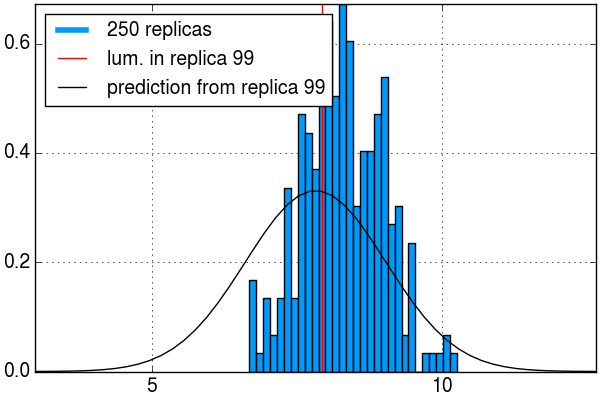

In [56]:
reload("Replica")
read_function = nsim -> Replica.read_real(nsim; npackets=10000, νmin=1.00677, νmax=1.0683018)
n, sums, predict, stddev = Replica.analyze(250, read_function)
i=99
println("E[n]=$(mean(n)), n[i]=$(n[i])")
Replica.plotprediction(sums, predict, stddev, i)


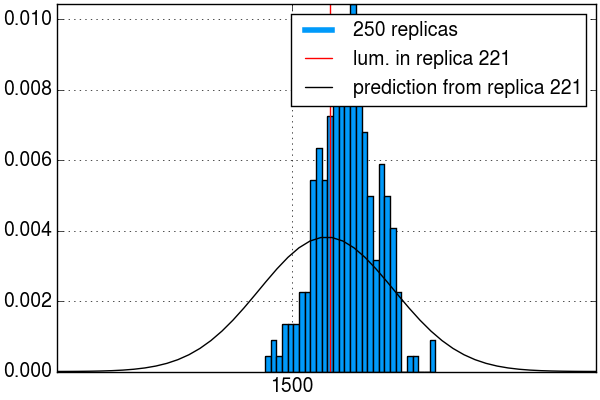

In [14]:
Replica.plotprediction(sums, predict, stddev, 221)


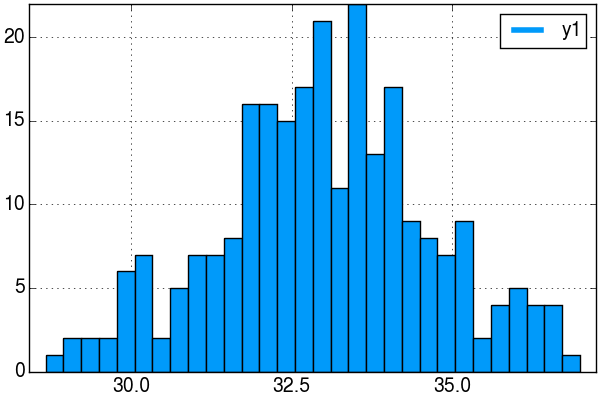

In [34]:
Plots.histogram(stddev)


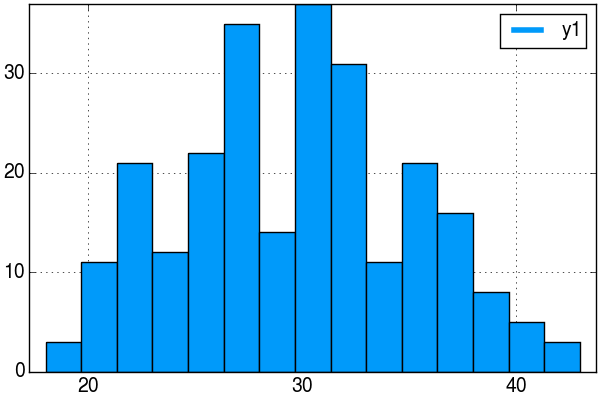

In [20]:
Plots.histogram(n, bins=15)


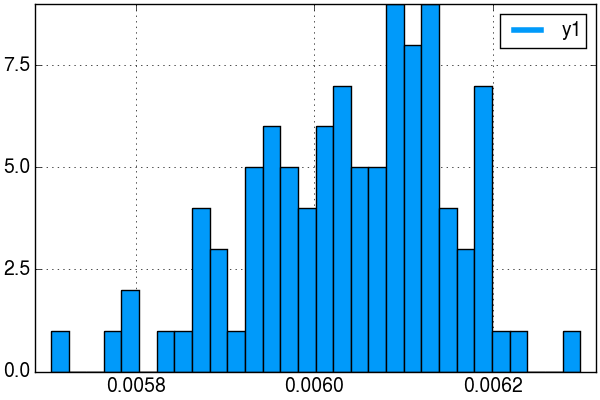

In [44]:
Plots.histogram(sums)

Now the virtual packets
-------

I guess simulations were done with different TARDIS parameter values, we can unfortunately compare real and virtual packets in the same $\nu$ bin. Even worse, the energies are rescaled for the real but not the virtual packets so the results are definitely not comparable

Observed: 0.006039106140577986 ± 0.00011094496050597615
Predicted: 0.006036180318928575 ± 0.00016371653811700435
mean n 7542.91



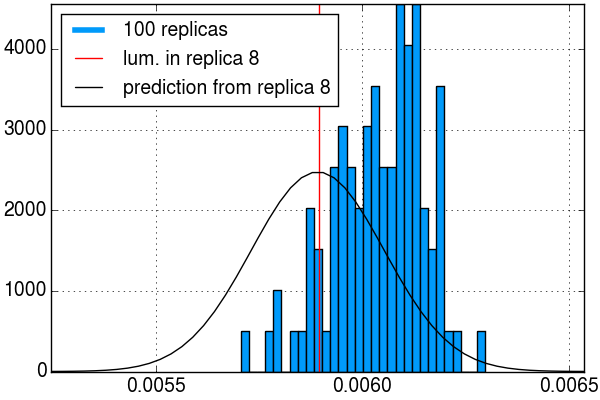

In [42]:
reload("Replica")
read_function = nsim -> Replica.read_virtual(nsim; νmin=1.00677, νmax=1.0183018)
n, sums, predict, stddev = Replica.analyze(100, read_function)
println("mean n ", mean(n))
Replica.plotprediction(sums, predict, stddev, 8)